In [1]:
import os
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde, kstest, uniform
import scipy.stats as stats

# bai Hotel KDE & Aspect Summary

C:\Users\andyb\AppData\Local\Temp\ipykernel_2992\3404897350.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


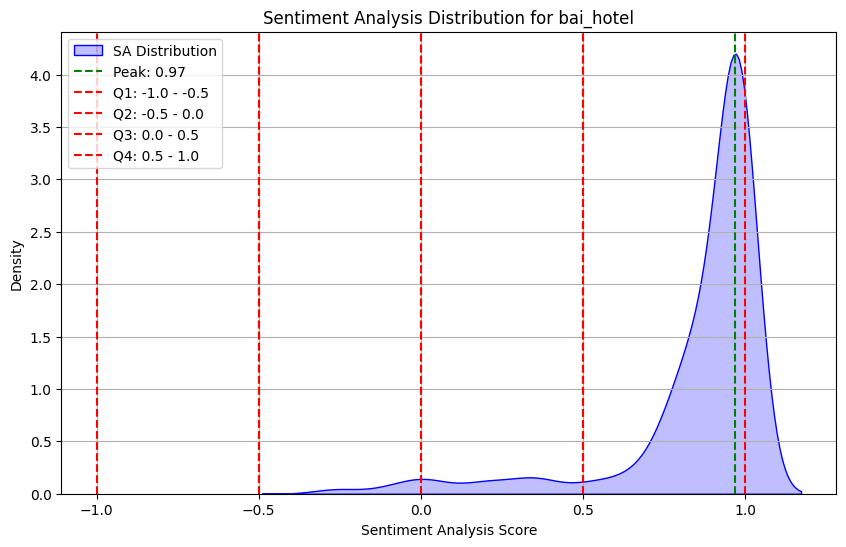

C:\Users\andyb\AppData\Local\Temp\ipykernel_2992\3404897350.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


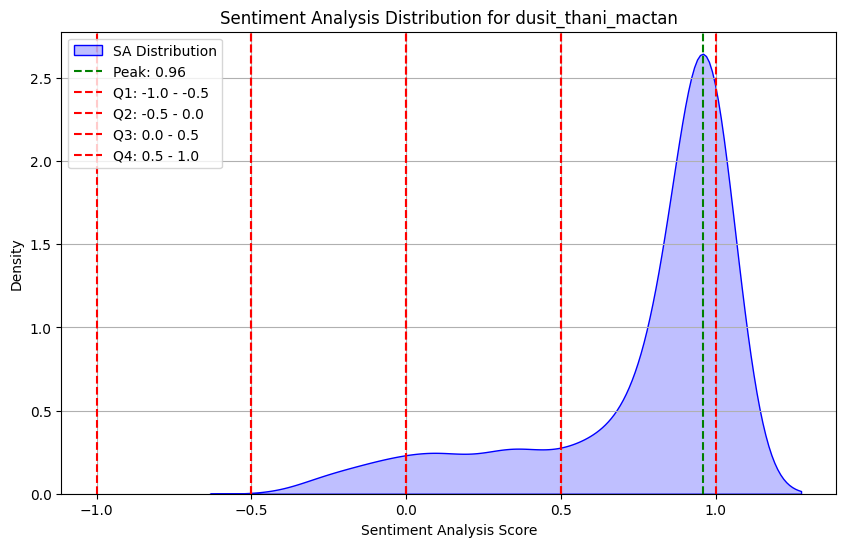

C:\Users\andyb\AppData\Local\Temp\ipykernel_2992\3404897350.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


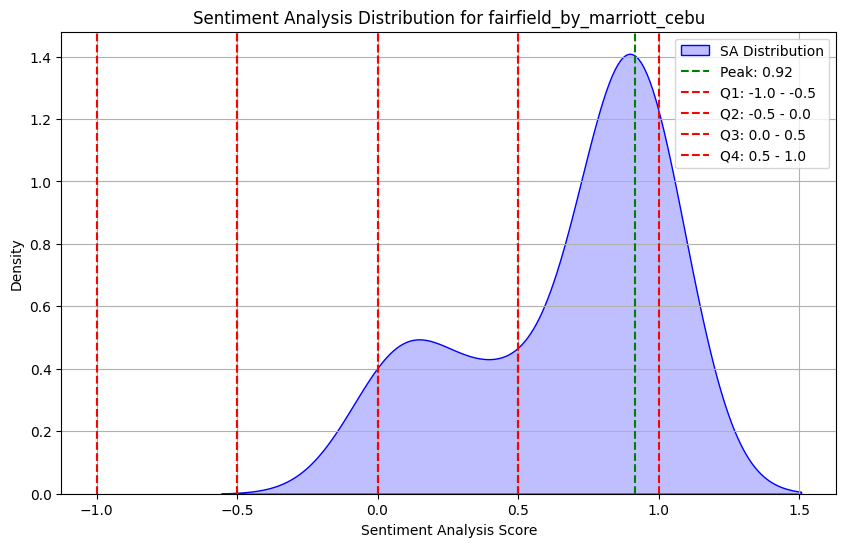

C:\Users\andyb\AppData\Local\Temp\ipykernel_2992\3404897350.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


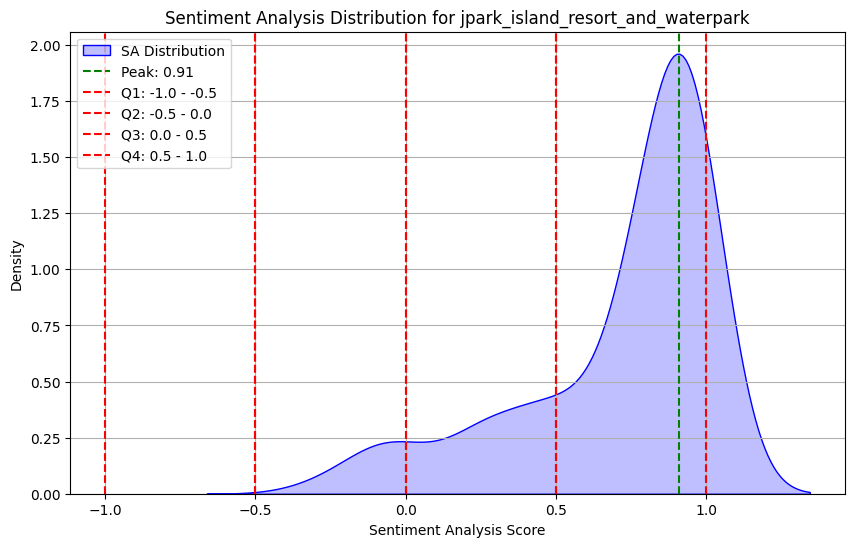

C:\Users\andyb\AppData\Local\Temp\ipykernel_2992\3404897350.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


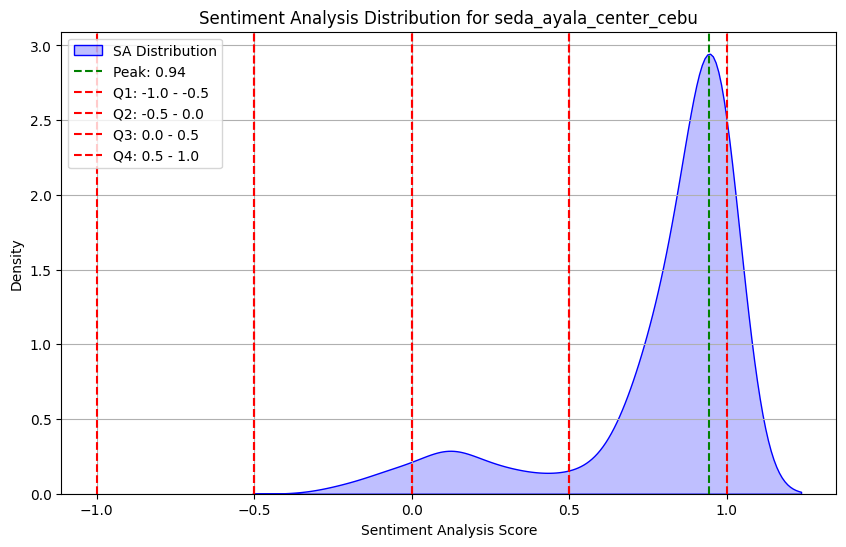

C:\Users\andyb\AppData\Local\Temp\ipykernel_2992\3404897350.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


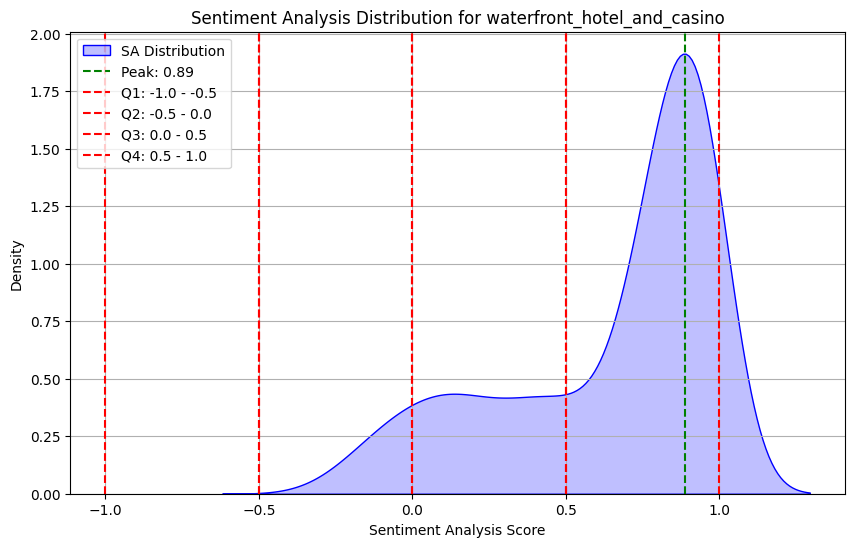

In [7]:
# Function to compute the unified sentiment score from predicted probabilities
def calculate_sentiment_score(predicted_scores):
    # Parse the predicted_scores string into a list of floats
    scores = ast.literal_eval(predicted_scores)
    # Apply the weighted averaging formula: -1 * P(Negative) + 0 * P(Neutral) + 1 * P(Positive)
    sentiment_score = -1 * scores[0] + 0 * scores[1] + 1 * scores[2]
    return sentiment_score

# Add a new column 'SA' for Sentiment Analysis score to the dataframe
bai_reviews['SA'] = bai_reviews['predicted_scores'].apply(calculate_sentiment_score)

# Define a function to plot KDE and peak
def plot_sa_distribution(df, hotel_name):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')
    plt.title(f'Sentiment Analysis Distribution for {hotel_name}')
    plt.xlabel('Sentiment Analysis Score')
    plt.ylabel('Density')

    # Calculate KDE and find peak
    kde = gaussian_kde(df['SA'])
    density_values = kde(df['SA'])
    peak_value = df['SA'][density_values.argmax()]
    plt.axvline(x=peak_value, linestyle='--', color='green', label=f'Peak: {round(peak_value, 2)}')

    # Add quartile lines
    quartile_ranges = {'Q1': (-1.0, -0.5), 'Q2': (-0.5, 0.0), 'Q3': (0.0, 0.5), 'Q4': (0.5, 1.0)}
    for label, (start, end) in quartile_ranges.items():
        plt.axvline(x=start, linestyle='--', color='red', label=f'{label}: {start} - {end}')
        plt.axvline(x=end, linestyle='--', color='red')

    plt.legend()
    plt.grid(True)
    plt.show()

    return peak_value

# Function to save the results
def save_results(hotel_name, peak_value, ks_stat, p_value):
    output_folder = "statistical model results"
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Create a file path for saving the results
    output_filename = os.path.join(output_folder, f"{hotel_name}_results.txt")

    # Determine which quartile the peak belongs to
    quartile_ranges = {'Q1': (-1.0, -0.5), 'Q2': (-0.5, 0.0), 'Q3': (0.0, 0.5), 'Q4': (0.5, 1.0)}
    peak_quartile = None
    for label, (start, end) in quartile_ranges.items():
        if start <= peak_value <= end:
            peak_quartile = label
            break

    # Open the file in write mode and save the results
    with open(output_filename, "w") as file:
        file.write(f"{hotel_name} Peak Value: {peak_value}\n")
        file.write(f"{hotel_name} Peak Quartile Classification: {peak_quartile}\n")
        file.write(f"K-S Test Statistic: {ks_stat}\n")
        file.write(f"K-S Test P-value: {p_value}\n")

# Perform Kolmogorov-Smirnov Test against Uniform Distribution
def ks_test_against_uniform(df):
    # Normalize the sentiment scores to the range [0, 1] for comparison with a uniform distribution
    sa_scores = df['SA']
    min_score, max_score = sa_scores.min(), sa_scores.max()
    normalized_scores = (sa_scores - min_score) / (max_score - min_score)
    
    # Perform K-S test
    ks_stat, p_value = kstest(normalized_scores, 'uniform')
    
    # Return the K-S test statistic and p-value
    return ks_stat, p_value

# Dictionary of hotel names and their corresponding CSV file paths
hotels = {
    "bai_hotel": r'C:\Users\andyb\Desktop\Coding Files\pointview\sentiment analysis\predictions_by_hotel\bai_hotel_predictions.csv',
    "dusit_thani_mactan": r'C:\Users\andyb\Desktop\Coding Files\pointview\sentiment analysis\predictions_by_hotel\dusit_thani_mactan_predictions.csv',
    "fairfield_by_marriott_cebu": r'C:\Users\andyb\Desktop\Coding Files\pointview\sentiment analysis\predictions_by_hotel\fairfield_by_marriott_cebu_predictions.csv',
    "jpark_island_resort_and_waterpark": r'C:\Users\andyb\Desktop\Coding Files\pointview\sentiment analysis\predictions_by_hotel\jpark_island_resort_and_waterpark_predictions.csv',
    "seda_ayala_center_cebu": r'C:\Users\andyb\Desktop\Coding Files\pointview\sentiment analysis\predictions_by_hotel\seda_ayala_center_cebu_predictions.csv',
    "waterfront_hotel_and_casino": r'C:\Users\andyb\Desktop\Coding Files\pointview\sentiment analysis\predictions_by_hotel\waterfront_hotel_and_casino_predictions.csv'
}

# Initialize a list to collect the results
ks_test_results = []

# Loop through each hotel, load the data, and process it
for hotel_name, file_path in hotels.items():
    # Load the dataset for the current hotel
    reviews_df = pd.read_csv(file_path)

    # Add a new column 'SA' for Sentiment Analysis score to the dataframe
    reviews_df['SA'] = reviews_df['predicted_scores'].apply(calculate_sentiment_score)

    # Plot KDE and find the peak sentiment analysis score
    peak_value = plot_sa_distribution(reviews_df, hotel_name)

    # Perform K-S test against uniform distribution
    ks_stat, p_value = ks_test_against_uniform(reviews_df)

    # Append the results to the list
    ks_test_results.append({
        'Hotel Name': hotel_name,
        'Peak Value': peak_value,
        'K-S Test Statistic': ks_stat,
        'P-value': p_value
    })

    # Save the results to a text file
    save_results(hotel_name, peak_value, ks_stat, p_value)

# Convert the list of results to a pandas DataFrame
ks_results_df = pd.DataFrame(ks_test_results)

# Optionally, save the results to a CSV file
ks_results_df.to_csv('ks_test_results.csv', index=False)

# Display the results in a table format
ks_results_df

In [3]:
# Define the path for bai_hotel sentiment results
bai_hotel = r"C:\Users\andyb\Desktop\Coding Files\PointView\datasets\sentiment_results\1_bai_hotel\1_bai_hotel_sentiment_analysis.csv"

# Function to load and display sentiment results for a specific hotel
def load_and_display_sentiment_result(hotel_file_path):
    if os.path.exists(hotel_file_path) and hotel_file_path.endswith('_sentiment_analysis.csv'):
        # Load the CSV file into a DataFrame
        df = pd.read_csv(hotel_file_path, index_col=0)
        
        # Extract the hotel name from the file path
        hotel_name = os.path.basename(hotel_file_path).split('_sentiment_analysis.csv')[0]
        
        # Display the DataFrame
        print("\n" + "="*50 + "\n")
        print(f"Sentiment Analysis for {hotel_name}:")
        print(df)
        print("\n" + "="*50 + "\n")
    else:
        print(f"File {hotel_file_path} not found or invalid format.")

# Call the function to display sentiment results for bai_hotel
load_and_display_sentiment_result(bai_hotel)




Sentiment Analysis for 1_bai_hotel:
                      positive  negative  positive_percent  negative_percent
food                    1111.0      46.0         27.506809          1.138896
staff                   1679.0      82.0         41.569695          2.030205
comfort & facilities       1.0       0.0          0.024759          0.000000
value for money           53.0       1.0          1.312206          0.024759




# Dusit Thani Mactan KDE & Aspect Summary

In [5]:
# Define the path for bai_hotel sentiment results
dusit_thani_mactan = r"C:\Users\andyb\Desktop\Coding Files\PointView\datasets\sentiment_results\2_dusit_thani_mactan\2_dusit_thani_mactan_sentiment_analysis.csv"

# Call the function to display sentiment results for bai_hotel
load_and_display_sentiment_result(dusit_thani_mactan)



Sentiment Analysis for 2_dusit_thani_mactan:
                      positive  negative  positive_percent  negative_percent
food                     536.0      55.0         28.389831          2.913136
staff                    882.0      63.0         46.716102          3.336864
comfort & facilities       0.0       0.0          0.000000          0.000000
value for money           12.0       1.0          0.635593          0.052966




# Fairfield by Marriott Cebu KDE & Aspect summary

In [7]:
# Define the path for bai_hotel sentiment results
fairfield_by_marriott_cebu = r"C:\Users\andyb\Desktop\Coding Files\PointView\datasets\sentiment_results\3_fairfield_by_marriott_cebu\3_fairfield_by_marriott_cebu_sentiment_analysis.csv"

# Call the function to display sentiment results for bai_hotel
load_and_display_sentiment_result(fairfield_by_marriott_cebu )



Sentiment Analysis for 3_fairfield_by_marriott_cebu:
                      positive  negative  positive_percent  negative_percent
food                      27.0       0.0         25.233645          0.000000
staff                     51.0       2.0         47.663551          1.869159
comfort & facilities       0.0       0.0          0.000000          0.000000
value for money            3.0       0.0          2.803738          0.000000




# JPark Island Resort and Waterpark KDE & Aspect summary

In [9]:
# Define the path for bai_hotel sentiment results
jpark_island_resort_and_waterpark = r"C:\Users\andyb\Desktop\Coding Files\PointView\datasets\sentiment_results\4_jpark_island_resort_and_waterpark\4_jpark_island_resort_and_waterpark_sentiment_analysis.csv"

# Call the function to display sentiment results for bai_hotel
load_and_display_sentiment_result(jpark_island_resort_and_waterpark)



Sentiment Analysis for 4_jpark_island_resort_and_waterpark:
                      positive  negative  positive_percent  negative_percent
food                     114.0       8.0         20.540541          1.441441
staff                    157.0      15.0         28.288288          2.702703
comfort & facilities       0.0       0.0          0.000000          0.000000
value for money            5.0       0.0          0.900901          0.000000




# Seda Ayala Center Cebu KDE & Aspect summary

In [11]:
# Define the path for bai_hotel sentiment results
seda_ayala_center_cebu = r"C:\Users\andyb\Desktop\Coding Files\PointView\datasets\sentiment_results\5_seda_ayala_center_cebu\5_seda_ayala_center_cebu_sentiment_analysis.csv"

# Call the function to display sentiment results for bai_hotel
load_and_display_sentiment_result(seda_ayala_center_cebu)



Sentiment Analysis for 5_seda_ayala_center_cebu:
                      positive  negative  positive_percent  negative_percent
food                     262.0      25.0         13.326551          1.271617
staff                    729.0      52.0         37.080366          2.644964
comfort & facilities       0.0       0.0          0.000000          0.000000
value for money           35.0       2.0          1.780264          0.101729




# Waterfront Hotel and Casino KDE & Aspect summary

In [13]:
# Define the path for bai_hotel sentiment results
waterfront_hotel_and_casino = r"C:\Users\andyb\Desktop\Coding Files\PointView\datasets\sentiment_results\6_waterfront_hotel_and_casino\6_waterfront_hotel_and_casino_sentiment_analysis.csv"

# Call the function to display sentiment results for bai_hotel
load_and_display_sentiment_result(waterfront_hotel_and_casino)



Sentiment Analysis for 6_waterfront_hotel_and_casino:
                      positive  negative  positive_percent  negative_percent
food                     185.0      41.0         10.966212          2.430350
staff                    433.0      51.0         25.666864          3.023118
comfort & facilities       0.0       0.0          0.000000          0.000000
value for money           23.0       2.0          1.363367          0.118554


